In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, learning_curve
# Function to create the ANN model
import time
from tqdm import tqdm


# Membaca file CSV
data = pd.read_csv('glcm_features_Data_Enhance.csv')

# Membuat DataFrame dari data
df = pd.DataFrame(data)

# Menampilkan DataFrame
print(df.columns)


Index(['contrast_1_0', 'dissimilarity_1_0', 'homogeneity_1_0', 'energy_1_0',
       'correlation_1_0', 'contrast_1_45', 'dissimilarity_1_45',
       'homogeneity_1_45', 'energy_1_45', 'correlation_1_45', 'contrast_1_90',
       'dissimilarity_1_90', 'homogeneity_1_90', 'energy_1_90',
       'correlation_1_90', 'contrast_1_135', 'dissimilarity_1_135',
       'homogeneity_1_135', 'energy_1_135', 'correlation_1_135',
       'contrast_2_0', 'dissimilarity_2_0', 'homogeneity_2_0', 'energy_2_0',
       'correlation_2_0', 'contrast_2_45', 'dissimilarity_2_45',
       'homogeneity_2_45', 'energy_2_45', 'correlation_2_45', 'contrast_2_90',
       'dissimilarity_2_90', 'homogeneity_2_90', 'energy_2_90',
       'correlation_2_90', 'contrast_2_135', 'dissimilarity_2_135',
       'homogeneity_2_135', 'energy_2_135', 'correlation_2_135',
       'contrast_3_0', 'dissimilarity_3_0', 'homogeneity_3_0', 'energy_3_0',
       'correlation_3_0', 'contrast_3_45', 'dissimilarity_3_45',
       'homogeneity_3_

Index(['contrast_1_0', 'dissimilarity_1_0', 'homogeneity_1_0', 'energy_1_0',
       'correlation_1_0', 'Label'],
      dtype='object')
      contrast_1_0  dissimilarity_1_0  homogeneity_1_0  energy_1_0   
0       135.534069         347.452848       336.650794  342.823654  \
1        46.697733         230.791161       231.684276  233.462932   
2        37.134191         152.484781       150.010789  151.258077   
3        45.891728         259.912045       255.878348  252.501027   
4        55.980147         622.607719       612.113963  621.267102   
...            ...                ...              ...         ...   
1195     10.145221         134.304637       137.359747  133.899409   
1196     29.421324         891.732026       881.433594  892.950016   
1197     28.146446         480.889760       470.667101  478.621600   
1198     34.909865         666.328354       658.898375  665.175412   
1199     23.022794         658.007719       651.891927  659.420666   

      correlation_1_0  L

C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 673us/step


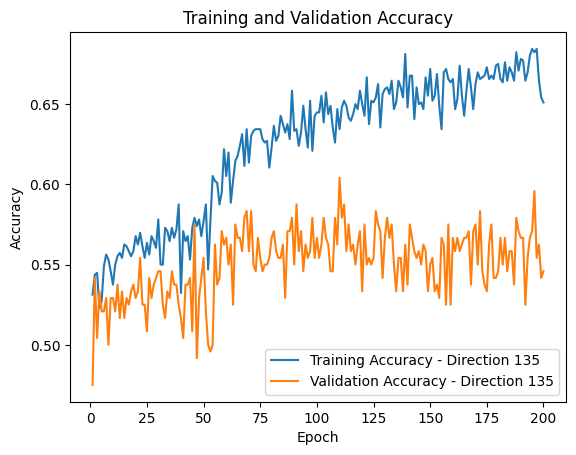

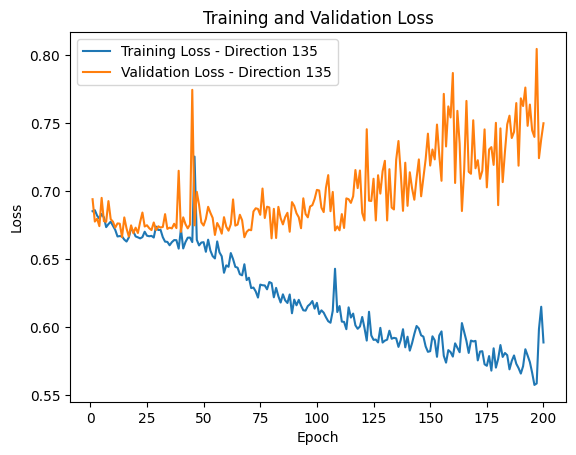

6/6 [==============================] - 0s 803us/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x000002111CFDE220>
Best Accuracy of Model: 0.5520833333333333

30/30 [==============================] - 0s 675us/step
Training Accuracy: 0.68125
Validation Accuracy: 0.5458333333333333
Training F1 Score: 0.7272727272727273
Validation F1 Score: 0.6093189964157706
Training Precision: 0.6375
Validation Precision: 0.5279503105590062
Cross-Validation Scores: [0.515625   0.5625     0.60416667 0.5625     0.5625    ]
Index(['contrast_1_45', 'dissimilarity_1_45', 'homogeneity_1_45',
       'energy_1_45', 'correlation_1_45', 'Label'],
      dtype='object')
      contrast_1_45  dissimilarity_1_45  homogeneity_1_45  energy_1_45   
0        347.452848          368.858493        342.823654   329.118268  \
1        230.791161          266.135144        233.462932    93.504755   
2        152.484781          179.078692        151.258077    82.787426   
3        259.912045          2

C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 607us/step


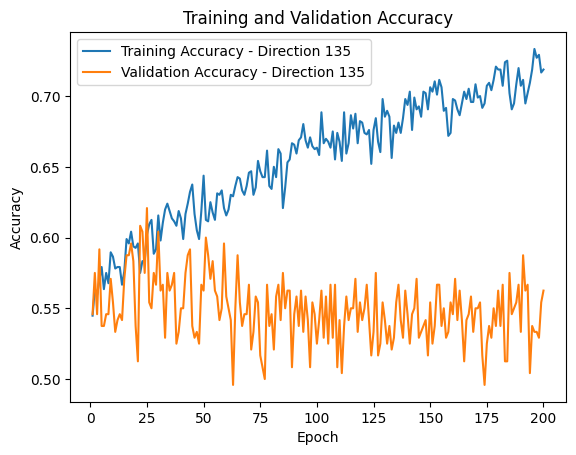

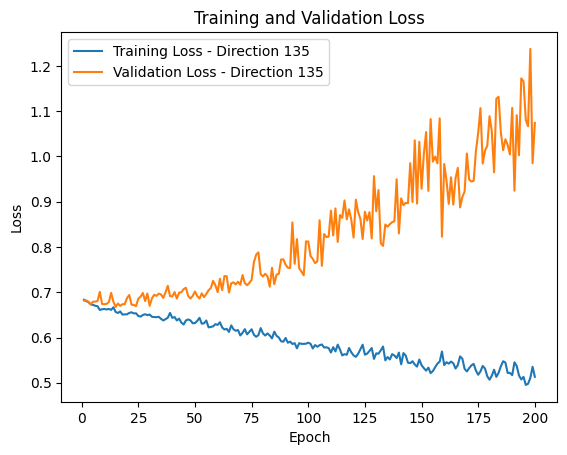

6/6 [==============================] - 0s 997us/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x000002112DF3BCA0>
Best Accuracy of Model: 0.5499999999999999

30/30 [==============================] - 0s 702us/step
Training Accuracy: 0.740625
Validation Accuracy: 0.5625
Training F1 Score: 0.7726027397260272
Validation F1 Score: 0.6125461254612545
Training Precision: 0.6900489396411092
Validation Precision: 0.5424836601307189
Cross-Validation Scores: [0.51041667 0.57291667 0.48958333 0.51041667 0.515625  ]
Index(['contrast_1_90', 'dissimilarity_1_90', 'homogeneity_1_90',
       'energy_1_90', 'correlation_1_90', 'Label'],
      dtype='object')
      contrast_1_90  dissimilarity_1_90  homogeneity_1_90  energy_1_90   
0        405.470735          393.586995        356.172433   430.799456  \
1        271.484759          268.737554        104.150856   274.739001   
2        180.906378          182.016193         88.917349   184.403745   
3        272.259285          

C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 667us/step


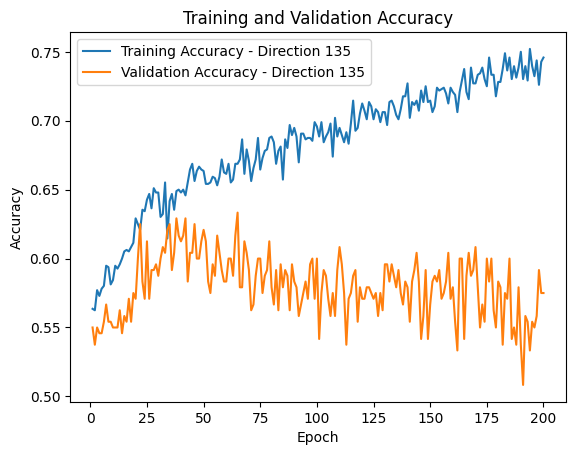

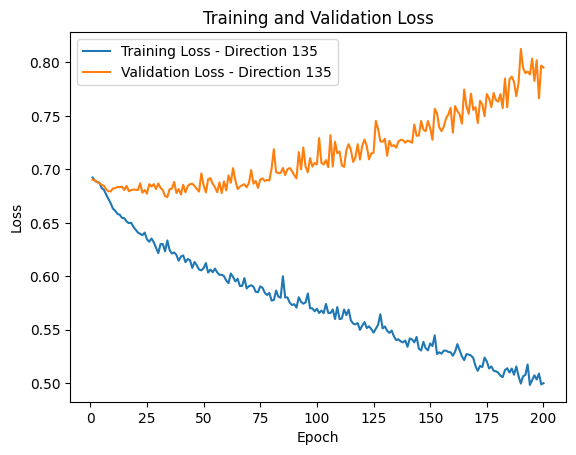

6/6 [==============================] - 0s 900us/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x00000211255AF2B0>
Best Accuracy of Model: 0.5614583333333333

30/30 [==============================] - 0s 698us/step
Training Accuracy: 0.7541666666666667
Validation Accuracy: 0.575
Training F1 Score: 0.7658730158730158
Validation F1 Score: 0.6046511627906977
Training Precision: 0.7338403041825095
Validation Precision: 0.5571428571428572
Cross-Validation Scores: [0.5        0.41145833 0.58333333 0.5        0.515625  ]
Index(['contrast_1_135', 'dissimilarity_1_135', 'homogeneity_1_135',
       'energy_1_135', 'correlation_1_135', 'Label'],
      dtype='object')
      contrast_1_135  dissimilarity_1_135  homogeneity_1_135  energy_1_135   
0         424.597227           322.935321         448.483333    431.672338  \
1         272.942526           108.283927         275.940807    270.520855   
2         184.323787            85.447958         189.116601    191.270723   

C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 651us/step


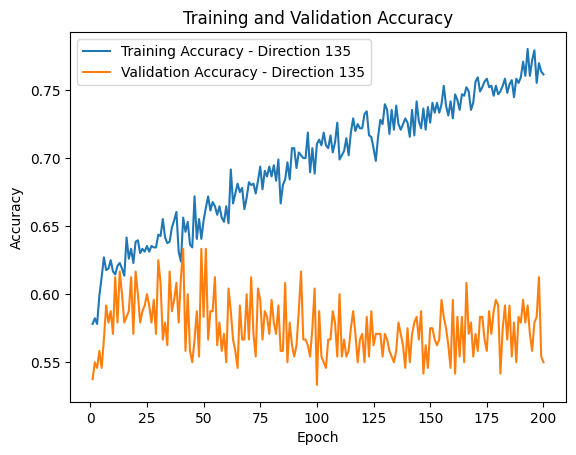

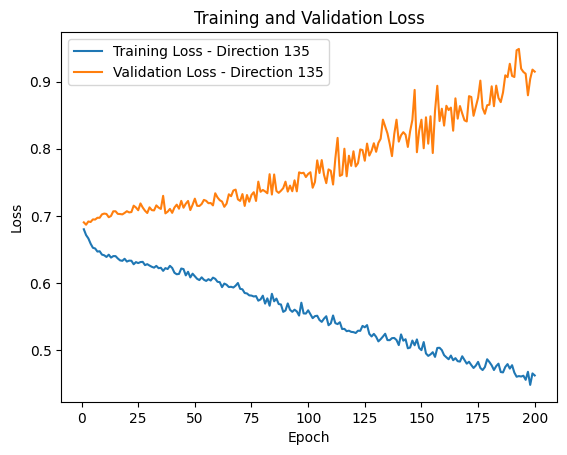

6/6 [==============================] - 0s 799us/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x000002112DED22E0>
Best Accuracy of Model: 0.5979166666666667

30/30 [==============================] - 0s 692us/step
Training Accuracy: 0.7635416666666667
Validation Accuracy: 0.55
Training F1 Score: 0.7736789631106681
Validation F1 Score: 0.564516129032258
Training Precision: 0.744721689059501
Validation Precision: 0.5384615384615384
Cross-Validation Scores: [0.578125   0.58854167 0.58854167 0.453125   0.609375  ]
Index(['contrast_2_0', 'dissimilarity_2_0', 'homogeneity_2_0', 'energy_2_0',
       'correlation_2_0', 'Label'],
      dtype='object')
      contrast_2_0  dissimilarity_2_0  homogeneity_2_0  energy_2_0   
0         6.680882          12.973794        12.598462   12.870837  \
1         2.518076           7.338064         7.287946    7.348024   
2         2.981985           7.473389         7.373884    7.415935   
3         1.292708           7.936197       

C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 688us/step


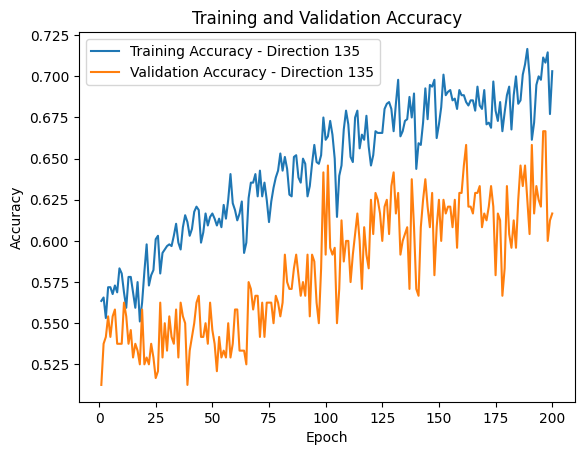

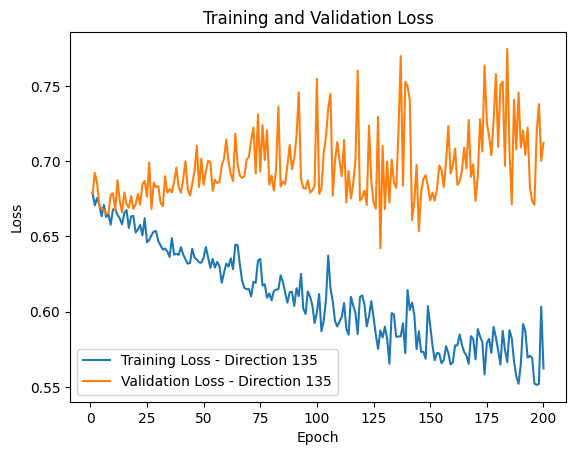

6/6 [==============================] - 0s 805us/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x00000211279C2C10>
Best Accuracy of Model: 0.5604166666666667

30/30 [==============================] - 0s 649us/step
Training Accuracy: 0.7052083333333333
Validation Accuracy: 0.6166666666666667
Training F1 Score: 0.743427017225748
Validation F1 Score: 0.6592592592592593
Training Precision: 0.6602254428341385
Validation Precision: 0.5855263157894737
Cross-Validation Scores: [0.53125    0.57291667 0.59375    0.58854167 0.65625   ]
Index(['contrast_2_45', 'dissimilarity_2_45', 'homogeneity_2_45',
       'energy_2_45', 'correlation_2_45', 'Label'],
      dtype='object')
      contrast_2_45  dissimilarity_2_45  homogeneity_2_45  energy_2_45   
0         12.973794           13.254284         12.870837    12.208683  \
1          7.338064            8.196888          7.348024     4.759079   
2          7.473389            8.301474          7.415935     5.600914   
3       

C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 694us/step


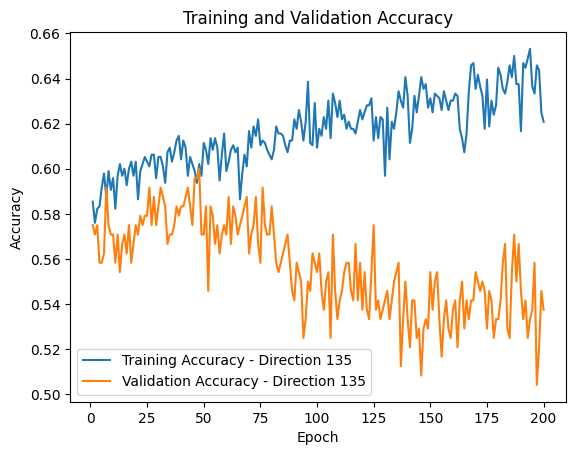

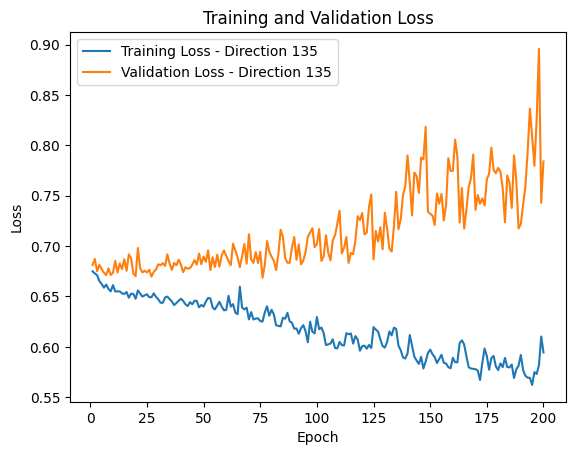

6/6 [==============================] - 0s 998us/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000021129BC4130>
Best Accuracy of Model: 0.5864583333333333

30/30 [==============================] - 0s 663us/step
Training Accuracy: 0.6375
Validation Accuracy: 0.5375
Training F1 Score: 0.5617128463476071
Validation F1 Score: 0.43654822335025384
Training Precision: 0.7147435897435898
Validation Precision: 0.5443037974683544
Cross-Validation Scores: [0.546875   0.59895833 0.63020833 0.52604167 0.54166667]
Index(['contrast_2_90', 'dissimilarity_2_90', 'homogeneity_2_90',
       'energy_2_90', 'correlation_2_90', 'Label'],
      dtype='object')
      contrast_2_90  dissimilarity_2_90  homogeneity_2_90  energy_2_90   
0         14.388384           14.009144         12.804253    15.003434  \
1          8.409708            8.429324          5.153460     8.540465   
2          8.510502            8.600394          5.965092     8.751312   
3          8.320889           

C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 630us/step


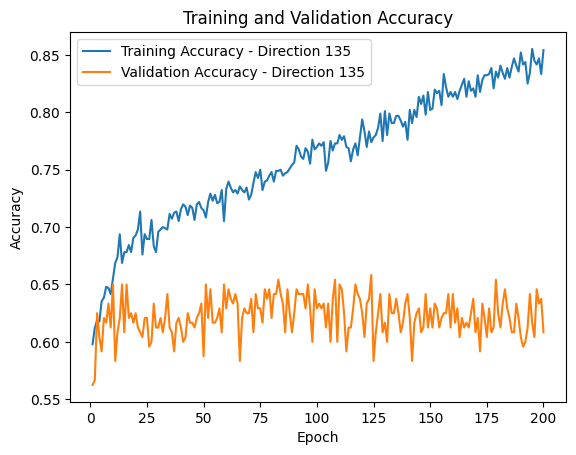

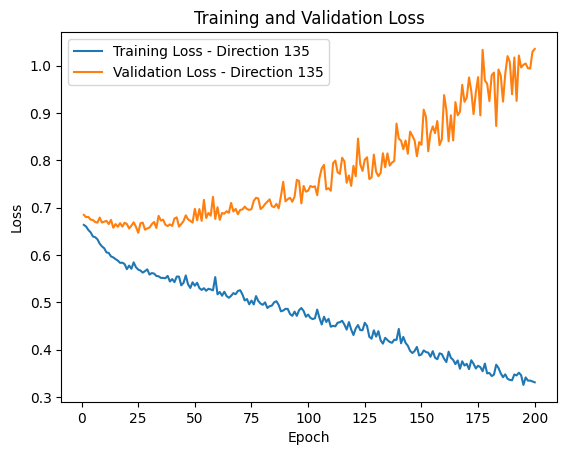

6/6 [==============================] - 0s 983us/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000021120734850>
Best Accuracy of Model: 0.5885416666666666

30/30 [==============================] - 0s 737us/step
Training Accuracy: 0.846875
Validation Accuracy: 0.6083333333333333
Training F1 Score: 0.8576960309777347
Validation F1 Score: 0.6299212598425196
Training Precision: 0.8039927404718693
Validation Precision: 0.5882352941176471
Cross-Validation Scores: [0.58333333 0.59895833 0.61979167 0.52604167 0.63020833]
Index(['contrast_2_135', 'dissimilarity_2_135', 'homogeneity_2_135',
       'energy_2_135', 'correlation_2_135', 'Label'],
      dtype='object')
      contrast_2_135  dissimilarity_2_135  homogeneity_2_135  energy_2_135   
0          14.962548            12.299490          15.230159     15.168763  \
1           8.515907             5.161292           8.466204      8.686110   
2           8.753645             5.877490           8.709458      8.881290

C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 657us/step


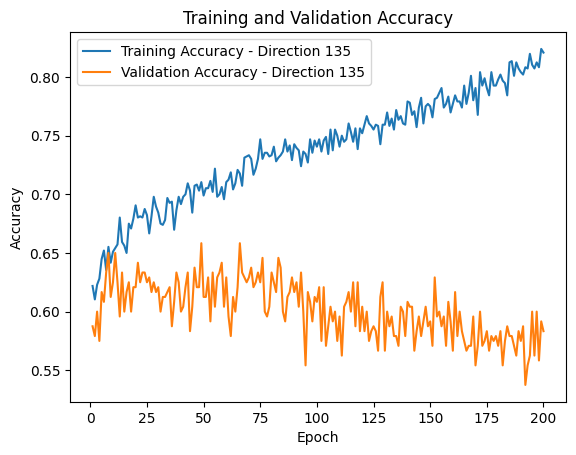

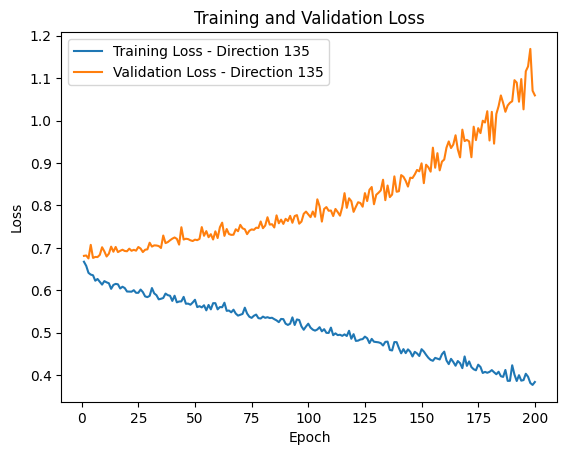

6/6 [==============================] - 0s 798us/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x00000211219205B0>
Best Accuracy of Model: 0.6052083333333332

30/30 [==============================] - 0s 696us/step
Training Accuracy: 0.8354166666666667
Validation Accuracy: 0.5833333333333334
Training F1 Score: 0.8457031249999999
Validation F1 Score: 0.6031746031746031
Training Precision: 0.7988929889298892
Validation Precision: 0.5671641791044776
Cross-Validation Scores: [0.54166667 0.640625   0.65625    0.53645833 0.65625   ]
Index(['contrast_3_0', 'dissimilarity_3_0', 'homogeneity_3_0', 'energy_3_0',
       'correlation_3_0', 'Label'],
      dtype='object')
      contrast_3_0  dissimilarity_3_0  homogeneity_3_0  energy_3_0   
0         0.238120           0.108318         0.117553    0.110390  \
1         0.433912           0.211739         0.213912    0.209989   
2         0.384247           0.174138         0.175451    0.171427   
3         0.600757          

C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 694us/step


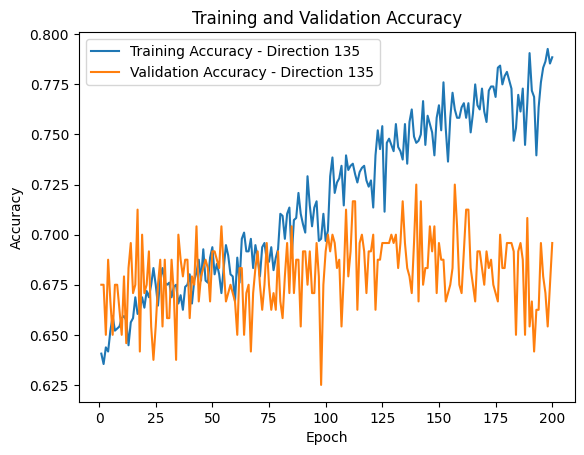

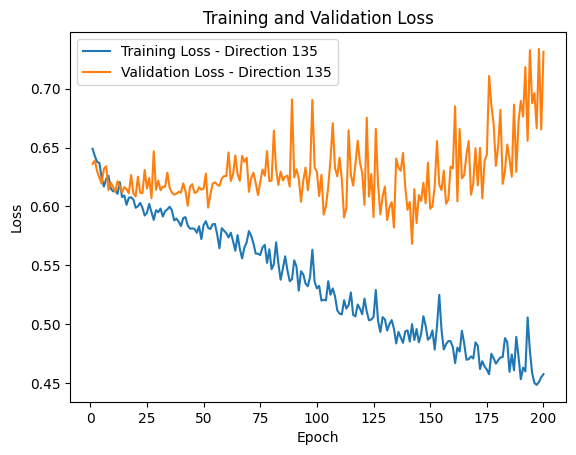

6/6 [==============================] - 0s 798us/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x00000211419F40A0>
Best Accuracy of Model: 0.6479166666666666

30/30 [==============================] - 0s 653us/step
Training Accuracy: 0.7958333333333333
Validation Accuracy: 0.6958333333333333
Training F1 Score: 0.8164794007490638
Validation F1 Score: 0.718146718146718
Training Precision: 0.7440273037542662
Validation Precision: 0.6595744680851063
Cross-Validation Scores: [0.58854167 0.609375   0.63541667 0.61979167 0.66666667]
Index(['contrast_3_45', 'dissimilarity_3_45', 'homogeneity_3_45',
       'energy_3_45', 'correlation_3_45', 'Label'],
      dtype='object')
      contrast_3_45  dissimilarity_3_45  homogeneity_3_45  energy_3_45   
0          0.108318            0.106945          0.110390     0.124426  \
1          0.211739            0.192301          0.209989     0.255683   
2          0.174138            0.149318          0.171427     0.213349   
3       

C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 669us/step


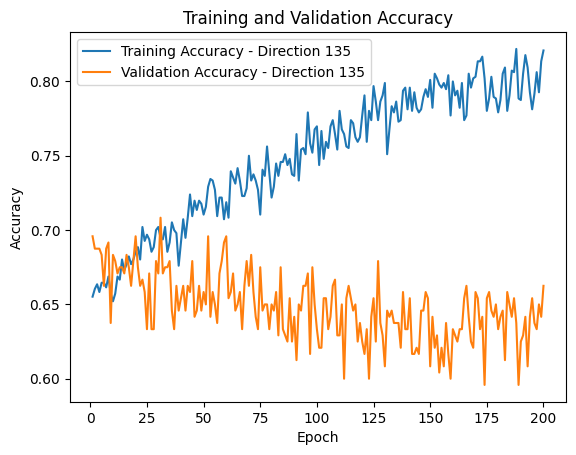

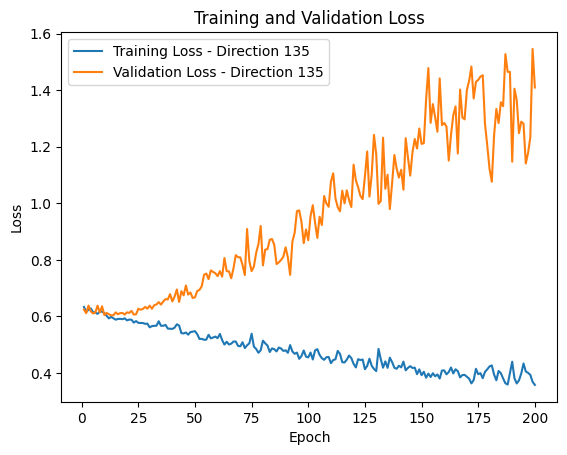

6/6 [==============================] - 0s 896us/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000021129BEE940>
Best Accuracy of Model: 0.6645833333333333

30/30 [==============================] - 0s 654us/step
Training Accuracy: 0.8375
Validation Accuracy: 0.6625
Training F1 Score: 0.847953216374269
Validation F1 Score: 0.6798418972332015
Training Precision: 0.7996323529411765
Validation Precision: 0.6370370370370371
Cross-Validation Scores: [0.63020833 0.63541667 0.63020833 0.66145833 0.48958333]
Index(['contrast_3_90', 'dissimilarity_3_90', 'homogeneity_3_90',
       'energy_3_90', 'correlation_3_90', 'Label'],
      dtype='object')
      contrast_3_90  dissimilarity_3_90  homogeneity_3_90  energy_3_90   
0          0.091906            0.097220          0.119791     0.085147  \
1          0.176046            0.174918          0.239308     0.166401   
2          0.137480            0.136229          0.199159     0.131706   
3          0.175429            0

C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 658us/step


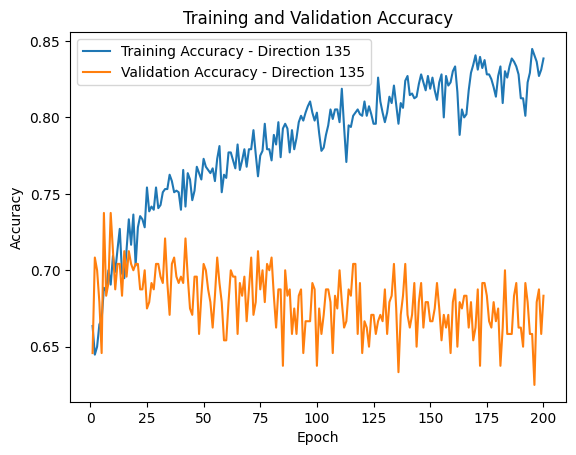

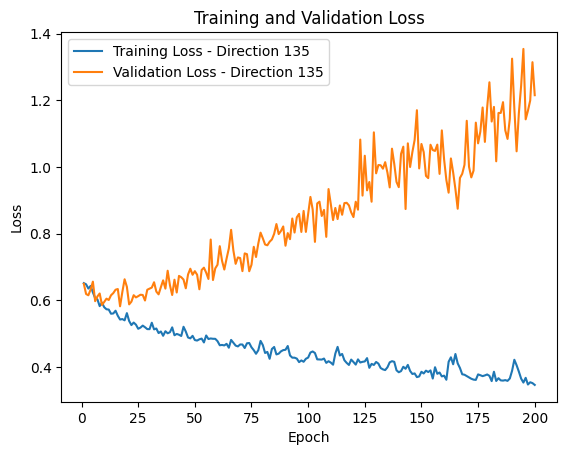

6/6 [==============================] - 0s 920us/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x00000211418D7790>
Best Accuracy of Model: 0.665625

30/30 [==============================] - 0s 680us/step
Training Accuracy: 0.8385416666666666
Validation Accuracy: 0.6833333333333333
Training F1 Score: 0.846077457795432
Validation F1 Score: 0.6960000000000001
Training Precision: 0.8114285714285714
Validation Precision: 0.6590909090909091
Cross-Validation Scores: [0.64583333 0.65104167 0.64583333 0.63541667 0.69270833]
Index(['contrast_3_135', 'dissimilarity_3_135', 'homogeneity_3_135',
       'energy_3_135', 'correlation_3_135', 'Label'],
      dtype='object')
      contrast_3_135  dissimilarity_3_135  homogeneity_3_135  energy_3_135   
0           0.084314             0.119168           0.084765      0.084450  \
1           0.164523             0.243099           0.169392      0.165600   
2           0.130082             0.198828           0.136866      0.133863 

C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 626us/step


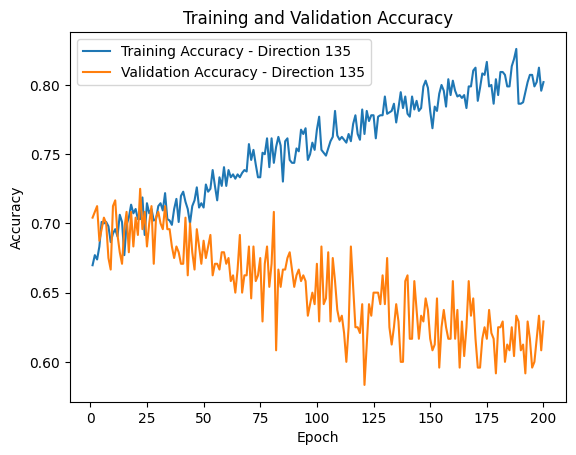

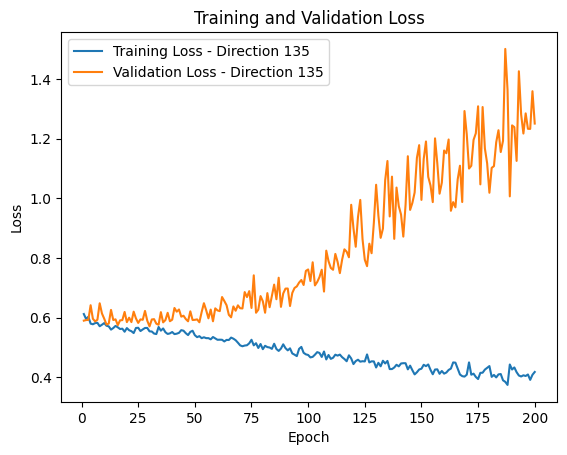

6/6 [==============================] - 0s 3ms/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x000002111CFBE8E0>
Best Accuracy of Model: 0.6604166666666667

30/30 [==============================] - 0s 704us/step
Training Accuracy: 0.8041666666666667
Validation Accuracy: 0.6291666666666667
Training F1 Score: 0.8045738045738046
Validation F1 Score: 0.600896860986547
Training Precision: 0.80625
Validation Precision: 0.638095238095238
Cross-Validation Scores: [0.58854167 0.63020833 0.6875     0.66145833 0.69791667]
Index(['contrast_4_0', 'dissimilarity_4_0', 'homogeneity_4_0', 'energy_4_0',
       'correlation_4_0', 'Label'],
      dtype='object')
      contrast_4_0  dissimilarity_4_0  homogeneity_4_0  energy_4_0   
0         0.073280           0.051660         0.052523    0.051802  \
1         0.094147           0.062717         0.063264    0.062936   
2         0.074307           0.049695         0.050027    0.049796   
3         0.133443           0.067729      

C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 398us/step


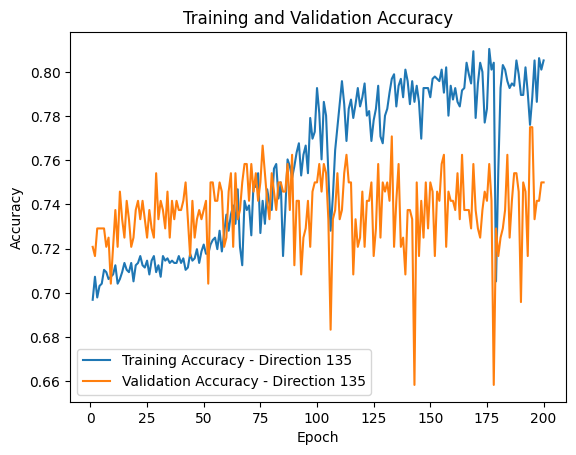

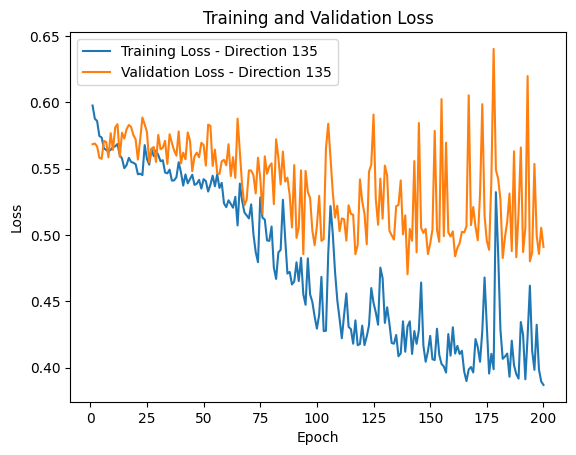

6/6 [==============================] - 0s 2ms/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000021125747F40>
Best Accuracy of Model: 0.703125

30/30 [==============================] - 0s 694us/step
Training Accuracy: 0.8052083333333333
Validation Accuracy: 0.75
Training F1 Score: 0.8050052137643379
Validation F1 Score: 0.7413793103448276
Training Precision: 0.8092243186582809
Validation Precision: 0.7543859649122807
Cross-Validation Scores: [0.71354167 0.64583333 0.75       0.68229167 0.72395833]
Index(['contrast_4_45', 'dissimilarity_4_45', 'homogeneity_4_45',
       'energy_4_45', 'correlation_4_45', 'Label'],
      dtype='object')
      contrast_4_45  dissimilarity_4_45  homogeneity_4_45  energy_4_45   
0          0.051660            0.051456          0.051802     0.054124  \
1          0.062717            0.061691          0.062936     0.068672   
2          0.049695            0.047772          0.049796     0.053912   
3          0.067729            0.

C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 330us/step


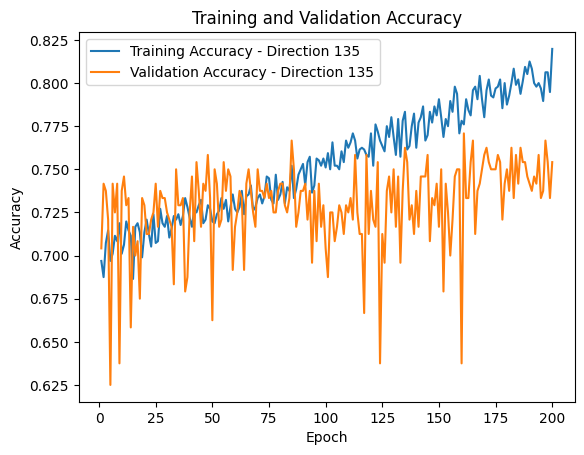

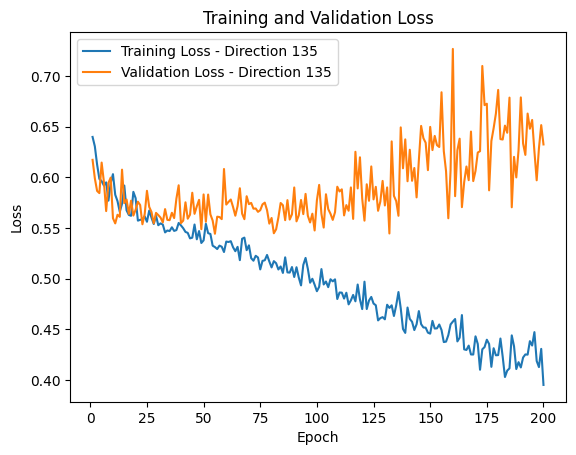

6/6 [==============================] - 0s 2ms/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x000002114ADC9280>
Best Accuracy of Model: 0.6989583333333332

30/30 [==============================] - 0s 894us/step
Training Accuracy: 0.8083333333333333
Validation Accuracy: 0.7541666666666667
Training F1 Score: 0.8148893360160965
Validation F1 Score: 0.7510548523206751
Training Precision: 0.791015625
Validation Precision: 0.7478991596638656
Cross-Validation Scores: [0.69270833 0.625      0.75520833 0.671875   0.71354167]
Index(['contrast_4_90', 'dissimilarity_4_90', 'homogeneity_4_90',
       'energy_4_90', 'correlation_4_90', 'Label'],
      dtype='object')
      contrast_4_90  dissimilarity_4_90  homogeneity_4_90  energy_4_90   
0          0.049342            0.049902          0.053157     0.048442  \
1          0.060070            0.059761          0.066665     0.058763   
2          0.046771            0.046768          0.052578     0.046103   
3          0.065

C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 659us/step


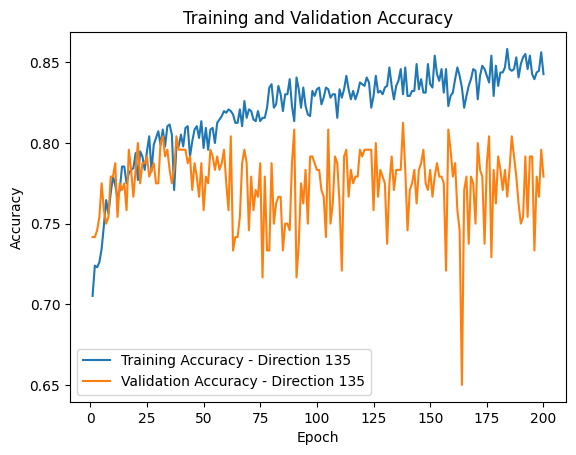

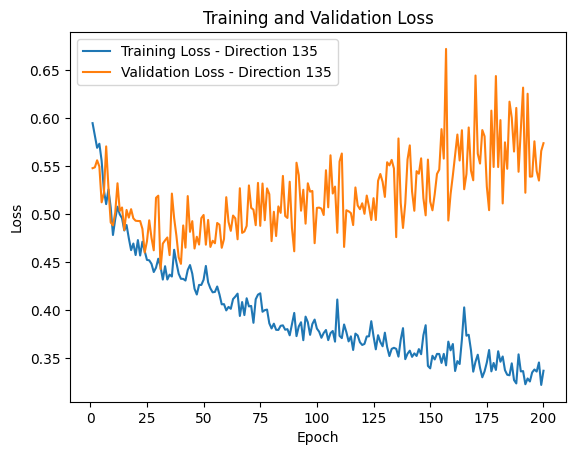

6/6 [==============================] - 0s 2ms/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x00000211342974F0>
Best Accuracy of Model: 0.7020833333333334

30/30 [==============================] - 0s 672us/step
Training Accuracy: 0.86875
Validation Accuracy: 0.7791666666666667
Training F1 Score: 0.8692946058091287
Validation F1 Score: 0.7705627705627707
Training Precision: 0.8692946058091287
Validation Precision: 0.7876106194690266
Cross-Validation Scores: [0.69270833 0.65104167 0.73958333 0.68229167 0.72916667]
Index(['contrast_4_135', 'dissimilarity_4_135', 'homogeneity_4_135',
       'energy_4_135', 'correlation_4_135', 'Label'],
      dtype='object')
      contrast_4_135  dissimilarity_4_135  homogeneity_4_135  energy_4_135   
0           0.048342             0.053405           0.048262      0.048154  \
1           0.058741             0.067504           0.058987      0.058989   
2           0.045935             0.052551           0.046330      0.046063   

C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 686us/step


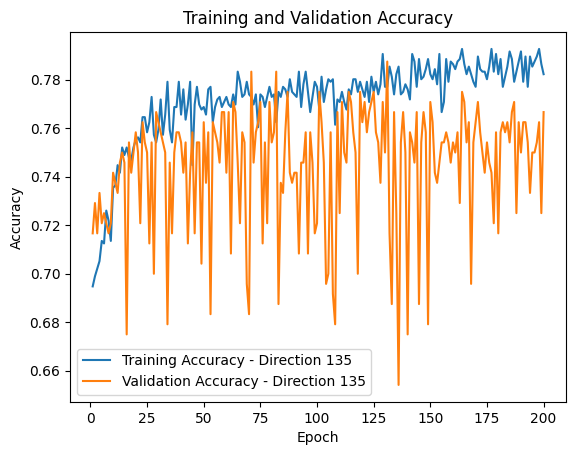

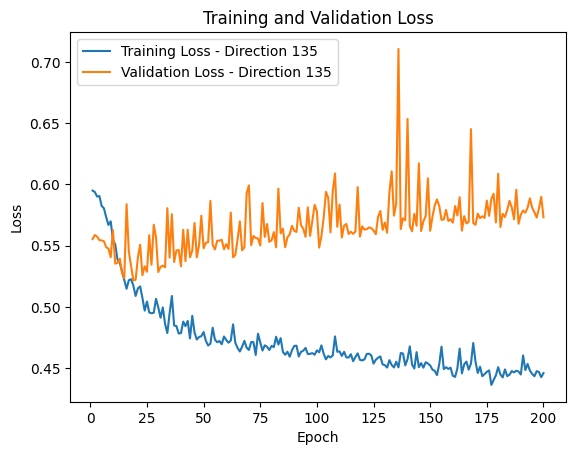

6/6 [==============================] - 0s 3ms/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x000002115D4BCEE0>
Best Accuracy of Model: 0.7052083333333333

30/30 [==============================] - 0s 672us/step
Training Accuracy: 0.7927083333333333
Validation Accuracy: 0.7666666666666667
Training F1 Score: 0.8039408866995074
Validation F1 Score: 0.7704918032786885
Training Precision: 0.7654784240150094
Validation Precision: 0.746031746031746
Cross-Validation Scores: [0.70833333 0.640625   0.6875     0.67708333 0.44270833]
Index(['contrast_5_0', 'dissimilarity_5_0', 'homogeneity_5_0', 'energy_5_0',
       'correlation_5_0', 'Label'],
      dtype='object')
      contrast_5_0  dissimilarity_5_0  homogeneity_5_0  energy_5_0   
0         0.725016           0.290864         0.312955    0.300240  \
1         0.874934           0.357780         0.353692    0.350408   
2         0.840967           0.338295         0.351348    0.343968   
3         0.833451           0.

C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 950us/step


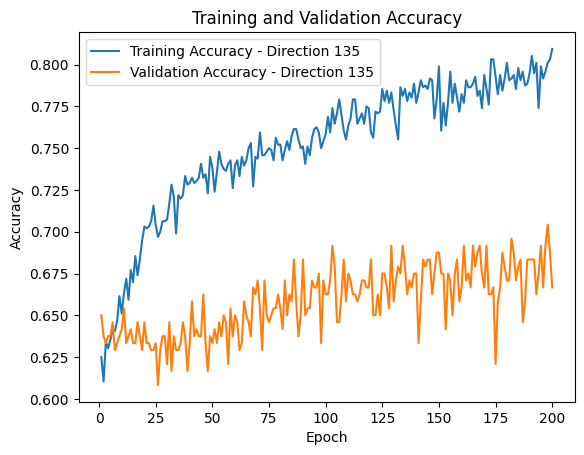

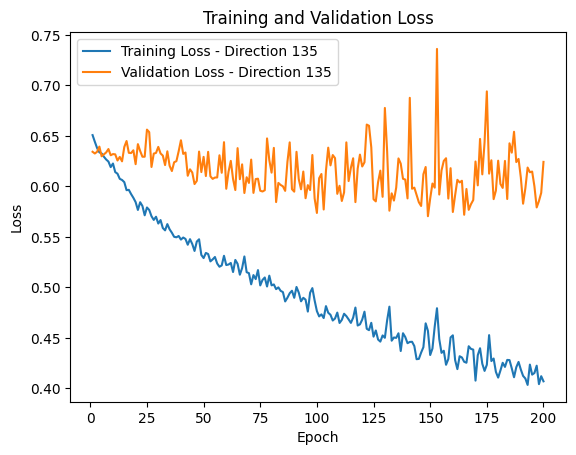

6/6 [==============================] - 0s 1ms/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000021159114610>
Best Accuracy of Model: 0.6083333333333333

30/30 [==============================] - 0s 681us/step
Training Accuracy: 0.815625
Validation Accuracy: 0.6666666666666666
Training F1 Score: 0.8210313447927199
Validation F1 Score: 0.6923076923076923
Training Precision: 0.8007889546351085
Validation Precision: 0.6338028169014085
Cross-Validation Scores: [0.61979167 0.63541667 0.65104167 0.609375   0.61458333]
Index(['contrast_5_45', 'dissimilarity_5_45', 'homogeneity_5_45',
       'energy_5_45', 'correlation_5_45', 'Label'],
      dtype='object')
      contrast_5_45  dissimilarity_5_45  homogeneity_5_45  energy_5_45   
0          0.290864            0.246718          0.300240     0.333082  \
1          0.357780            0.194441          0.350408     0.750826   
2          0.338295            0.195021          0.343968     0.642345   
3          0.066436

C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 718us/step


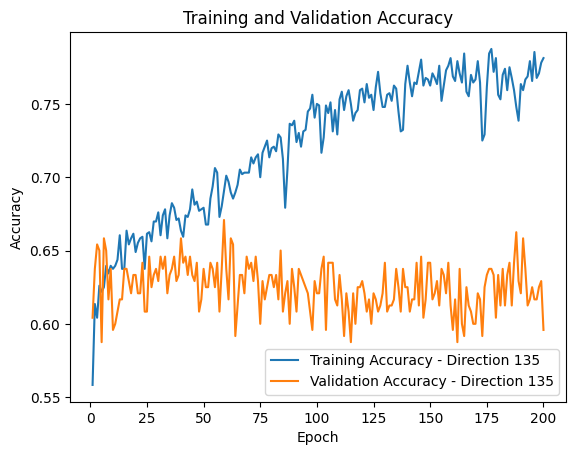

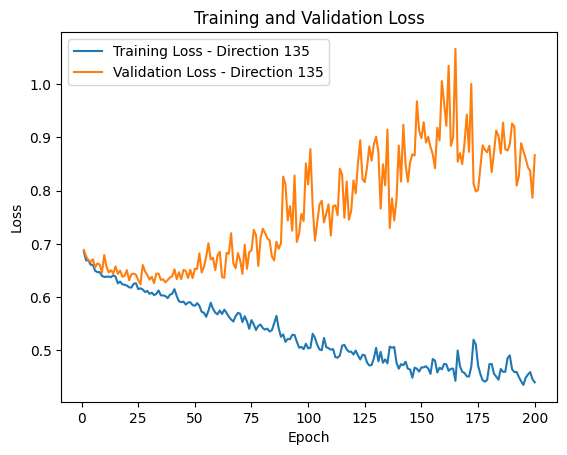

6/6 [==============================] - 0s 0s/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x000002119C4E3790>
Best Accuracy of Model: 0.6270833333333333

30/30 [==============================] - 0s 881us/step
Training Accuracy: 0.790625
Validation Accuracy: 0.5958333333333333
Training F1 Score: 0.7718501702610671
Validation F1 Score: 0.5764192139737991
Training Precision: 0.8521303258145363
Validation Precision: 0.5945945945945946
Cross-Validation Scores: [0.58854167 0.64583333 0.63020833 0.61458333 0.609375  ]
Index(['contrast_5_90', 'dissimilarity_5_90', 'homogeneity_5_90',
       'energy_5_90', 'correlation_5_90', 'Label'],
      dtype='object')
      contrast_5_90  dissimilarity_5_90  homogeneity_5_90  energy_5_90   
0          0.171834            0.196124          0.279395     0.121411  \
1          0.184086            0.190495          0.723166     0.180171   
2          0.195900            0.177059          0.612997     0.170210   
3          0.019873 

C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 706us/step


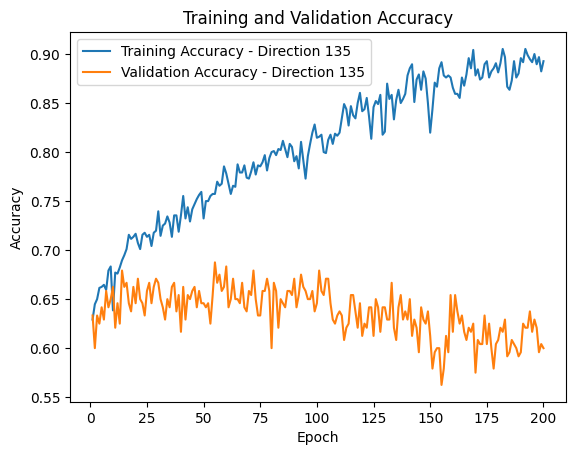

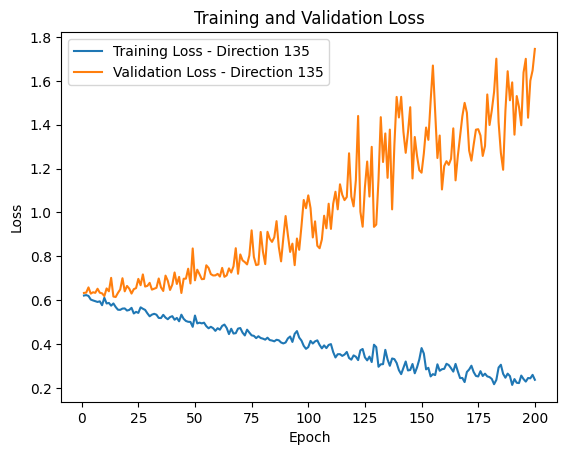

6/6 [==============================] - 0s 798us/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000021190364070>
Best Accuracy of Model: 0.63125

30/30 [==============================] - 0s 419us/step
Training Accuracy: 0.9145833333333333
Validation Accuracy: 0.6
Training F1 Score: 0.9149377593360996
Validation F1 Score: 0.6220472440944882
Training Precision: 0.9149377593360996
Validation Precision: 0.5808823529411765
Cross-Validation Scores: [0.61979167 0.5625     0.65625    0.64583333 0.60416667]
Index(['contrast_5_135', 'dissimilarity_5_135', 'homogeneity_5_135',
       'energy_5_135', 'correlation_5_135', 'Label'],
      dtype='object')
      contrast_5_135  dissimilarity_5_135  homogeneity_5_135  energy_5_135   
0           0.133670             0.347513           0.083673      0.123202  \
1           0.185687             0.712848           0.186052      0.192040   
2           0.172674             0.624789           0.146243      0.156961   
3           

C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_15944\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 694us/step


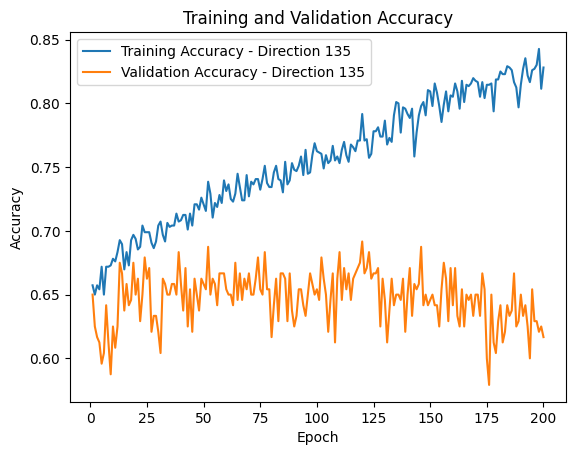

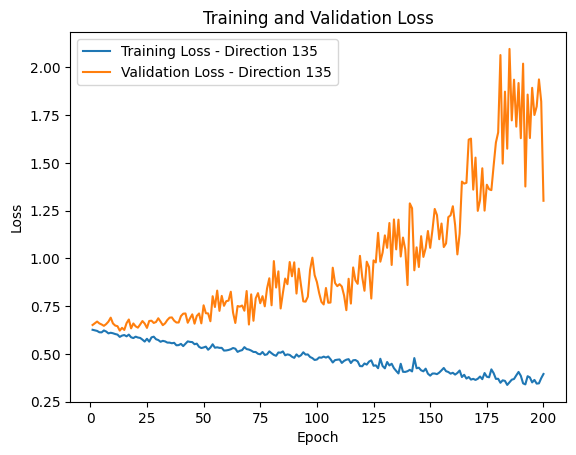

6/6 [==============================] - 0s 3ms/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x000002119C4E3430>
Best Accuracy of Model: 0.6531250000000001

30/30 [==============================] - 0s 611us/step
Training Accuracy: 0.8197916666666667
Validation Accuracy: 0.6166666666666667
Training F1 Score: 0.8240081383519837
Validation F1 Score: 0.6198347107438016
Training Precision: 0.8083832335329342
Validation Precision: 0.6048387096774194
Cross-Validation Scores: [0.61458333 0.66145833 0.73958333 0.625      0.67708333]
Execution Time: 1924.8456540107727 seconds


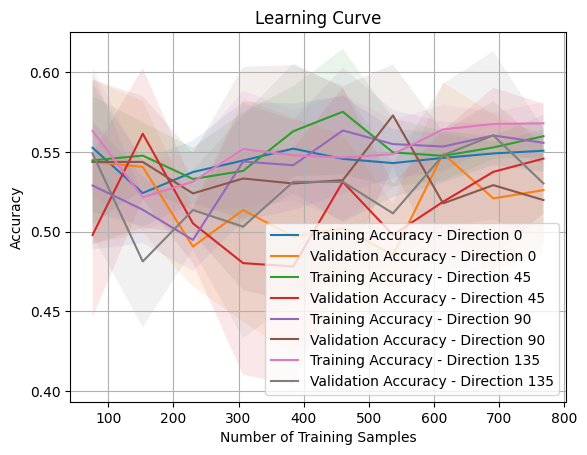

Average Accuracy: 0.7928125
Average F1 Score: 0.7994003900028519
Average Precision: 0.777827858489386


In [2]:
def create_model(units_1=64, units_2=32, units_3=16, units_4=8, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(units_1, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(units_2, activation='relu'))
    model.add(Dense(units_3, activation='relu'))
    model.add(Dense(units_4, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

# List of directions
directions = ['0', '45', '90', '135']
distances = ['1', '2', '3', '4', '5']
# Hapus kolom image
# data.drop('Image', axis=1, inplace=True)
# Memisahkan DataFrame berdasarkan arah
dfs = [data.filter(regex=f'_{direction}$') for direction in directions]

# Set the 'Label' column values using .loc

accuracies = []
f1score = []
precision = []
index_column = ["Akurasi", "F1_Score", "Presisi"]
# Loop through each direction
train_mean_list = []
test_mean_list = []
val_train_mean_list = []
val_test_mean_list = []

start_time = time.time()
dfs = {}
for distance in distances:
    for direction in directions:
        # Membuat nama DataFrame yang sesuai
        df_name = f'df_{distance}_{direction}'

        # Memilih kolom-kolom yang sesuai dengan kombinasi distance dan direction
        selected_columns = [col for col in df.columns if f"_{distance}_{direction}" in col]

        # Membuat DataFrame baru berdasarkan kolom yang dipilih
        dfs[df_name] = df[selected_columns]

for df_name, df_selected in dfs.items():


    # Select the corresponding DataFrame
    df_selected.loc[:600, 'Label'] = 0
    df_selected.loc[600:, 'Label'] = 1
    
    
    print(df_selected.columns)
    # Prepare the data
    X = df_selected.drop('Label', axis=1).values
    y = df_selected['Label'].values
    print(df_selected)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Create the KerasClassifier wrapper for scikit-learn compatibility
    model = KerasClassifier(build_fn=create_model, verbose=0)
    
    # Define the hyperparameter grid for Random Search
    param_grid = {
        'units_1': [32, 64, 128],
        'units_2': [16, 32, 64],
        'units_3': [8, 16, 32],
        'units_4': [4, 8, 16],
        'learning_rate': [0.001, 0.01, 0.1]
    }
    
    # Perform Random Search
    random_search = RandomizedSearchCV(model, param_distributions=param_grid, cv=3, scoring='accuracy', n_iter=15)
    random_search.fit(X_train, y_train)
    
    # Get the best model and its accuracy
    best_model = random_search.best_estimator_
    best_acc = random_search.best_score_



    train_sizes, train_scores, test_scores = learning_curve(
        best_model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    train_mean_list.append(train_mean)
    test_mean_list.append(test_mean)
    
    # Pelatihan model dengan 100 epoch
    model = best_model.model  # Dapatkan model asli dari KerasClassifier
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200,batch_size=32, verbose=0)

    # Mengambil akurasi dan loss dari setiap epoch
    accuracy = history.history['accuracy']
    loss = history.history['loss']
    val_accuracy = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    
    

    # Menghasilkan grafik akurasi
    plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy - Direction {}'.format(direction))
    plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy - Direction {}'.format(direction))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

    # Menghasilkan grafik loss
    plt.plot(range(1, len(loss) + 1), loss, label='Training Loss - Direction {}'.format(direction))
    plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss - Direction {}'.format(direction))
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
    
    
    # Make predictions on the test set
    y_pred = best_model.predict(X_test)
    y_pred = [round(x[0]) for x in y_pred]

    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
    # Print the results
    print("Best Model:", best_model)
    print("Best Accuracy of Model:", best_acc)
    
    print()
    
    # Calculate the accuracy, F1 score, and precision
    train_acc = accuracy_score(y_train, best_model.predict(X_train))
    val_acc = accuracy_score(y_test, y_pred)

    train_f1 = f1_score(y_train, best_model.predict(X_train))
    val_f1 = f1_score(y_test, y_pred)

    train_prec = precision_score(y_train, best_model.predict(X_train))
    val_prec = precision_score(y_test, y_pred)

    # Print the results
    print("Training Accuracy:", train_acc)
    print("Validation Accuracy:", val_acc)
    print("Training F1 Score:", train_f1)
    print("Validation F1 Score:", val_f1)
    print("Training Precision:", train_prec)
    print("Validation Precision:", val_prec)
    print("Cross-Validation Scores:", cv_scores)

    accuracies.append(train_acc)
    f1score.append(train_f1)
    precision.append(train_prec)
    
end_time = time.time()
execution_time = end_time - start_time

print("Execution Time:", execution_time, "seconds")

plt.figure()
for direction, train_mean, test_mean in zip(directions, train_mean_list, test_mean_list):
    plt.plot(train_sizes, train_mean, label=f'Training Accuracy - Direction {direction}')
    plt.plot(train_sizes, test_mean, label=f'Validation Accuracy - Direction {direction}')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Calculate and print the average accuracy
average_accuracy = np.mean(accuracies)
average_f1score = np.mean(f1score)
average_precision = np.mean(precision)

print("Average Accuracy:", average_accuracy)
print("Average F1 Score:", average_f1score)
print("Average Precision:", average_precision)

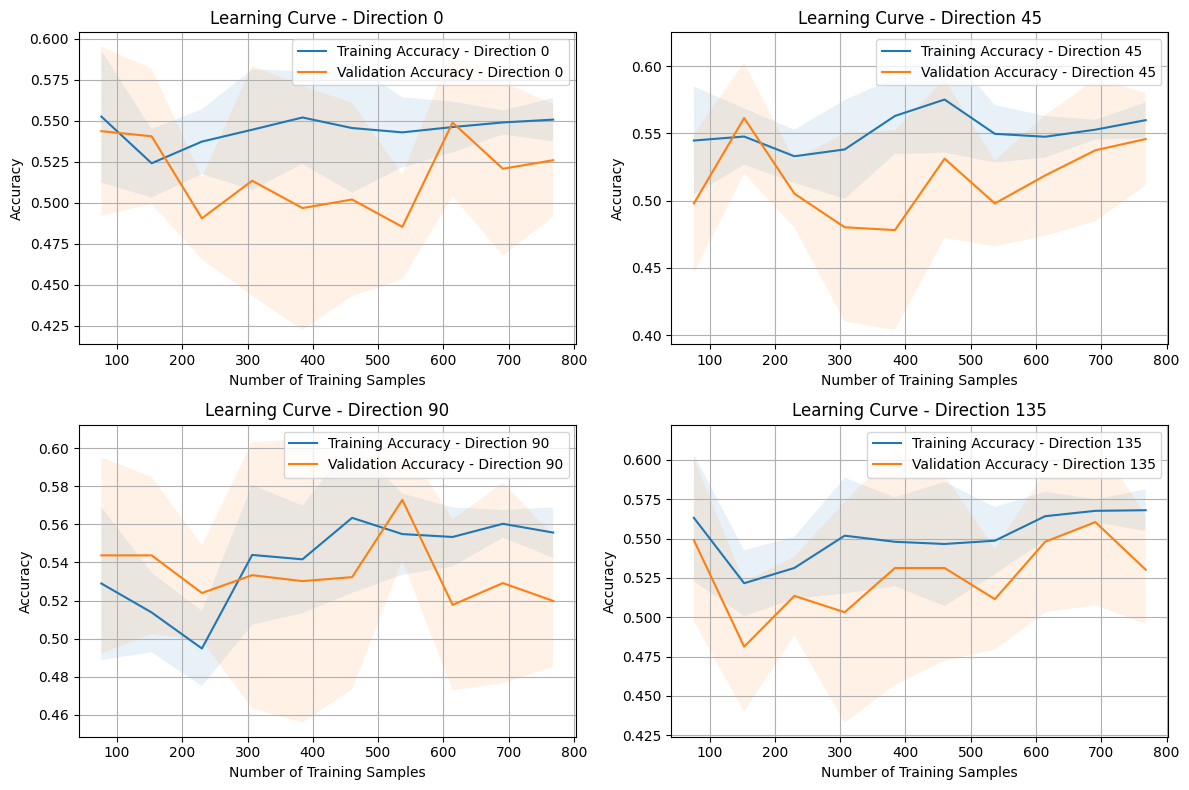

In [31]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, (direction, train_mean, test_mean) in enumerate(zip(directions, train_mean_list, test_mean_list)):
    row = i // 2  # Menentukan baris subplot
    col = i % 2  # Menentukan kolom subplot
    ax = axes[row, col]  # Mengambil sumbu subplot pada baris dan kolom yang sesuai
    ax.plot(train_sizes, train_mean, label=f'Training Accuracy - Direction {direction}')
    ax.plot(train_sizes, test_mean, label=f'Validation Accuracy - Direction {direction}')
    ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    ax.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
    ax.set_xlabel('Number of Training Samples')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'Learning Curve - Direction {direction}')
    ax.legend(loc='best')
    ax.grid(True)

plt.tight_layout()  # Untuk menjaga jarak antara subplot
plt.show()

In [63]:
for i in range(len(accuracies)):
    print(i, accuracies[i])

0 0.68125
1 0.740625
2 0.7541666666666667
3 0.7635416666666667
4 0.7052083333333333
5 0.6375
6 0.846875
7 0.8354166666666667
8 0.7958333333333333
9 0.8375
10 0.8385416666666666
11 0.8041666666666667
12 0.8052083333333333
13 0.8083333333333333
14 0.86875
15 0.7927083333333333
16 0.815625
17 0.790625
18 0.9145833333333333
19 0.8197916666666667


In [84]:
degree_ = ["Akurasi","Degree 0","Degree 45","Degree 90","Degree 135"]
distances = ["Jarak 1","Jarak 2","Jarak 3","Jarak 4","Jarak 5"]

dataAkurasi = {
    degree_[0] : distances,
    degree_[1] : [accuracies[0], accuracies[1], accuracies[2], accuracies[3], accuracies[4]],
    degree_[2] : [accuracies[5], accuracies[6], accuracies[7], accuracies[8], accuracies[9]],
    degree_[3] : [accuracies[10], accuracies[11], accuracies[12], accuracies[13], accuracies[14]],
    degree_[4] : [accuracies[15], accuracies[16], accuracies[17], accuracies[18], accuracies[19]]
}

degree_ = ["F1 Score","Degree 0","Degree 45","Degree 90","Degree 135"]
distances = ["Jarak 1","Jarak 2","Jarak 3","Jarak 4","Jarak 5"]

dataF1Score = {
    degree_[0] : distances,
    degree_[1] : [f1score[0], f1score[1], f1score[2], f1score[3], f1score[4]],
    degree_[2] : [f1score[5], f1score[6], f1score[7], f1score[8], f1score[9]],
    degree_[3] : [f1score[10], f1score[11], f1score[12], f1score[13], f1score[14]],
    degree_[4] : [f1score[15], f1score[16], f1score[17], f1score[18], f1score[19]]
}

degree_ = ["Presisi","Degree 0","Degree 45","Degree 90","Degree 135"]
distances = ["Jarak 1","Jarak 2","Jarak 3","Jarak 4","Jarak 5"]

dataPresisi = {
    degree_[0] : distances,
    degree_[1] : [precision[0], precision[1], precision[2], precision[3], precision[4]],
    degree_[2] : [precision[5], precision[6], precision[7], precision[8], precision[9]],
    degree_[3] : [precision[10], precision[11], precision[12], precision[13], precision[14]],
    degree_[4] : [precision[15], precision[16], precision[17], precision[18], precision[19]]
}

In [85]:
df2 = pd.DataFrame(dataAkurasi)
print(df2)
print("=============================")
df3 = pd.DataFrame(dataF1Score)
print(df3)
print("=============================")
df4 = pd.DataFrame(dataPresisi)
print(df4)
print("=============================")


   Akurasi  Degree 0  Degree 45  Degree 90  Degree 135
0  Jarak 1  0.681250   0.637500   0.838542    0.792708
1  Jarak 2  0.740625   0.846875   0.804167    0.815625
2  Jarak 3  0.754167   0.835417   0.805208    0.790625
3  Jarak 4  0.763542   0.795833   0.808333    0.914583
4  Jarak 5  0.705208   0.837500   0.868750    0.819792
  F1 Score  Degree 0  Degree 45  Degree 90  Degree 135
0  Jarak 1  0.727273   0.561713   0.846077    0.803941
1  Jarak 2  0.772603   0.857696   0.804574    0.821031
2  Jarak 3  0.765873   0.845703   0.805005    0.771850
3  Jarak 4  0.773679   0.816479   0.814889    0.914938
4  Jarak 5  0.743427   0.847953   0.869295    0.824008
   Presisi  Degree 0  Degree 45  Degree 90  Degree 135
0  Jarak 1  0.637500   0.714744   0.811429    0.765478
1  Jarak 2  0.690049   0.803993   0.806250    0.800789
2  Jarak 3  0.733840   0.798893   0.809224    0.852130
3  Jarak 4  0.744722   0.744027   0.791016    0.914938
4  Jarak 5  0.660225   0.799632   0.869295    0.808383


In [81]:
print(df.head())

   contrast_1_0  dissimilarity_1_0  homogeneity_1_0  energy_1_0   
0    135.534069         347.452848       336.650794  342.823654  \
1     46.697733         230.791161       231.684276  233.462932   
2     37.134191         152.484781       150.010789  151.258077   
3     45.891728         259.912045       255.878348  252.501027   
4     55.980147         622.607719       612.113963  621.267102   

   correlation_1_0  contrast_1_45  dissimilarity_1_45  homogeneity_1_45   
0       231.384843     347.452848          368.858493        342.823654  \
1        69.797429     230.791161          266.135144        233.462932   
2        64.634473     152.484781          179.078692        151.258077   
3        56.984990     259.912045          271.236706        252.501027   
4       133.505290     622.607719          670.751764        621.267102   

   energy_1_45  correlation_1_45  ...  contrast_5_90  dissimilarity_5_90   
0   329.118268        399.156591  ...       0.171834            0.1961

In [82]:
threshold = 0.07

# Mendefinisikan status model
model_status = []

# Memeriksa setiap kurva pembelajaran
for direction, train_mean, test_mean in zip(directions, train_mean_list, test_mean_list):
    train_diff = np.abs(train_mean - test_mean)  # Selisih antara akurasi pelatihan dan validasi
    max_diff = np.max(train_diff)  # Nilai selisih maksimum
    
    if max_diff > threshold:  # Jika selisih maksimum melebihi threshold, model dianggap overfitting
        status = 'Overfitting'
    elif np.mean(train_mean) < 0.5:  # Jika akurasi pelatihan rata-rata rendah, model dianggap underfitting
        status = 'Underfitting'
    else:  # Jika tidak memenuhi kriteria di atas, model dianggap baik
        status = 'Good'
    
    model_status.append((direction, status))

# Menampilkan hasil evaluasi model
for direction, status in model_status:
    print(f"Direction: {direction}\tStatus: {status}")

Direction: 0	Status: Good
Direction: 45	Status: Overfitting
Direction: 90	Status: Good
Direction: 135	Status: Good
